# Bab 3: Klasifikasi

Dalam bab ini, kita akan mendalami konsep-konsep inti klasifikasi dalam Machine Learning. Klasifikasi adalah tugas Machine Learning supervised di mana tujuannya adalah untuk memprediksi kelas atau kategori suatu input. Kita akan mempelajari berbagai metrik evaluasi untuk classifier, serta trade-off penting antara presisi dan recall.

Referensi utama bab ini adalah buku *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems* (O’Reilly) oleh Aurélien Géron.

## 3.1 MNIST

Dataset MNIST adalah "hello world" di dunia Machine Learning untuk tugas klasifikasi gambar. Dataset ini terdiri dari 70.000 gambar kecil (28x28 piksel) tulisan tangan digit (0-9) yang dikumpulkan dari siswa sekolah menengah dan karyawan Biro Sensus AS. Setiap gambar diberi label dengan digit yang diwakilinya.

Dataset ini sangat populer untuk pengujian dan perbandingan algoritma klasifikasi baru. Kita akan menggunakannya untuk melatih dan mengevaluasi model klasifikasi kita.

### Memuat Dataset MNIST

Scikit-Learn menyediakan fungsi pembantu untuk mengunduh dataset populer, termasuk MNIST.

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Memuat dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # as_frame=False agar langsung NumPy array
X, y = mnist["data"], mnist["target"]

print(f"Bentuk data (X): {X.shape}")
print(f"Bentuk target (y): {y.shape}")
print(f"Tipe data target: {y.dtype}")

Bentuk data (X): (70000, 784)
Bentuk target (y): (70000,)
Tipe data target: object


Dataset yang dimuat oleh Scikit-Learn umumnya memiliki struktur kamus yang serupa, termasuk:
* Kunci `DESCR` yang menjelaskan dataset.
* Kunci `data` yang berisi array dengan satu baris per instance dan satu kolom per fitur.
* Kunci `target` yang berisi array dengan label.

Ada 70.000 gambar, dan setiap gambar memiliki 784 fitur. Ini karena setiap gambar adalah 28 × 28 piksel, dan setiap fitur hanya mewakili intensitas satu piksel, dari 0 (putih) hingga 255 (hitam).

### Melihat Sekilas Satu Digit

Mari kita lihat sekilas salah satu digit dari dataset. Kita hanya perlu mengambil vektor fitur sebuah instance, mengubah bentuknya menjadi array 28 × 28, dan menampilkannya menggunakan fungsi `imshow()` Matplotlib.

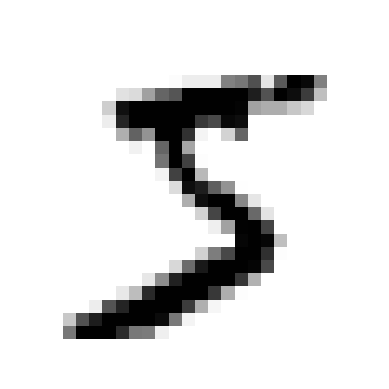

Label digit pertama: 5


In [2]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print(f"Label digit pertama: {y[0]}")

Perhatikan bahwa labelnya adalah string. Sebagian besar algoritma ML mengharapkan angka, jadi mari kita ubah `y` menjadi integer.

In [3]:
y = y.astype(np.uint8)

### Memisahkan Dataset Menjadi Set Pelatihan dan Pengujian

Penting untuk selalu membuat set pengujian dan menyimpannya terpisah sebelum memeriksa data lebih dekat untuk menghindari bias pengintaian data (data snooping bias). Dataset MNIST sudah dibagi menjadi set pelatihan (60.000 gambar pertama) dan set pengujian (10.000 gambar terakhir).

Set pelatihan sudah diacak, yang bagus karena ini menjamin bahwa semua *cross-validation folds* akan serupa. Selain itu, beberapa algoritma pembelajaran sensitif terhadap urutan instance pelatihan, dan mereka bekerja buruk jika mendapatkan banyak instance serupa berturut-turut. Mengacak dataset memastikan hal ini tidak akan terjadi.

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_test: {y_test.shape}")

Bentuk X_train: (60000, 784)
Bentuk y_train: (60000,)
Bentuk X_test: (10000, 784)
Bentuk y_test: (10000,)


## 3.2 Melatih Binary Classifier

Mari kita sederhanakan masalah untuk saat ini dan hanya mencoba mengidentifikasi satu digit—misalnya, angka 5. "Detektor-5" ini akan menjadi contoh *binary classifier*, yang mampu membedakan antara dua kelas saja: 5 dan bukan-5.

### Membuat Target Vektor untuk Klasifikasi Biner

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(f"Contoh y_train_5: {y_train_5[:5]}")

Contoh y_train_5: [ True False False False False]


### Memilih dan Melatih Classifier

Kita akan memilih *Stochastic Gradient Descent (SGD) classifier* menggunakan kelas `SGDClassifier` dari Scikit-Learn. Classifier ini memiliki keunggulan karena mampu menangani dataset yang sangat besar secara efisien, sebagian karena SGD menangani instance pelatihan secara independen, satu per satu, yang juga membuatnya cocok untuk *online learning*.

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Setelah melatih classifier, kita bisa menggunakannya untuk mendeteksi gambar angka 5.

In [8]:
some_digit_pred = sgd_clf.predict([some_digit])
print(f"Prediksi untuk some_digit (yang adalah 5): {some_digit_pred}")

Prediksi untuk some_digit (yang adalah 5): [ True]


## 3.3 Performance Measures (Pengukuran Kinerja)

Mengevaluasi classifier seringkali jauh lebih rumit daripada mengevaluasi regressor.

### 3.3.1 Measuring Accuracy Using Cross-Validation (Mengukur Akurasi Menggunakan Cross-Validation)

Salah satu cara yang baik untuk mengevaluasi model adalah dengan menggunakan cross-validation, seperti yang Anda lakukan di Bab 2.

In [9]:
from sklearn.model_selection import cross_val_score

# Menggunakan cross_val_score untuk SGDClassifier
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Skor akurasi cross-validation: {scores}")

Skor akurasi cross-validation: [0.95035 0.96035 0.9604 ]


Hasil ini mungkin terlihat sangat tinggi (misalnya, di atas 93% akurasi). Namun, akurasi bukanlah ukuran kinerja yang disukai untuk classifier, terutama ketika Anda berhadapan dengan dataset yang miring (yaitu, ketika beberapa kelas jauh lebih sering daripada yang lain).

Untuk menunjukkan ini, mari kita lihat classifier yang sangat sederhana yang selalu mengklasifikasikan setiap gambar dalam kelas "bukan-5".

In [10]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
never_5_scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Skor akurasi Never5Classifier: {never_5_scores}")

Skor akurasi Never5Classifier: [0.91125 0.90855 0.90915]


Classifier ini memiliki akurasi di atas 90% karena hanya sekitar 10% gambar yang merupakan angka 5. Jika Anda selalu menebak bahwa sebuah gambar bukan angka 5, Anda akan benar sekitar 90% dari waktu.

### 3.3.2 Confusion Matrix

Cara yang jauh lebih baik untuk mengevaluasi kinerja classifier adalah dengan melihat *confusion matrix*. Ide umumnya adalah menghitung berapa kali instance dari kelas A diklasifikasikan sebagai kelas B.

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
conf_mx = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix:")
print(conf_mx)

Confusion Matrix:
[[53892   687]
 [ 1891  3530]]


Setiap baris dalam confusion matrix mewakili kelas aktual, sedangkan setiap kolom mewakili kelas yang diprediksi.

* Baris pertama (kelas negatif, "bukan-5"):
    * **True Negatives (TN):** Jumlah instance yang diklasifikasikan dengan benar sebagai bukan-5.
    * **False Positives (FP):** Jumlah instance yang salah diklasifikasikan sebagai 5.
* Baris kedua (kelas positif, "5"):
    * **False Negatives (FN):** Jumlah instance yang salah diklasifikasikan sebagai bukan-5.
    * **True Positives (TP):** Jumlah instance yang diklasifikasikan dengan benar sebagai 5.

Classifier yang sempurna hanya akan memiliki true positives dan true negatives, sehingga confusion matrix-nya hanya akan memiliki nilai bukan-nol pada diagonal utamanya.

In [12]:
# Contoh confusion matrix untuk classifier sempurna
y_train_perfect_predictions = y_train_5  # Pura-pura mencapai kesempurnaan
perfect_conf_mx = confusion_matrix(y_train_5, y_train_perfect_predictions)
print("\nConfusion Matrix (Sempurna):")
print(perfect_conf_mx)


Confusion Matrix (Sempurna):
[[54579     0]
 [    0  5421]]


### 3.3.3 Precision and Recall (Presisi dan Recall)

Salah satu yang menarik untuk dilihat adalah akurasi prediksi positif; ini disebut *precision* (presisi) classifier.

In [13]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print(f"\nPresisi: {precision}")
print(f"Recall: {recall}")


Presisi: 0.8370879772350012
Recall: 0.6511713705958311


Seringkali nyaman untuk menggabungkan presisi dan recall ke dalam satu metrik yang disebut *F1 score*, terutama jika Anda memerlukan cara sederhana untuk membandingkan dua classifier. F1 score adalah *harmonic mean* dari presisi dan recall.

In [14]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5, y_train_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.7325171197343847


### 3.3.4 Precision/Recall Trade-off (Trade-off Presisi/Recall)

Sayangnya, Anda tidak bisa mendapatkan keduanya: meningkatkan presisi mengurangi recall, dan sebaliknya. Ini disebut *precision/recall trade-off*.

Classifier seperti `SGDClassifier` membuat keputusan klasifikasinya berdasarkan fungsi keputusan. Jika skor dari fungsi keputusan ini lebih besar dari ambang batas tertentu, ia menetapkan instance ke kelas positif; jika tidak, ia menetapkannya ke kelas negatif.

In [15]:
y_scores = sgd_clf.decision_function([some_digit])
print(f"Skor keputusan untuk some_digit: {y_scores}")

threshold = 0
y_some_digit_pred_thresh0 = (y_scores > threshold)
print(f"Prediksi dengan ambang batas 0: {y_some_digit_pred_thresh0}")

threshold = 8000
y_some_digit_pred_thresh8k = (y_scores > threshold)
print(f"Prediksi dengan ambang batas 8000: {y_some_digit_pred_thresh8k}")

Skor keputusan untuk some_digit: [2164.22030239]
Prediksi dengan ambang batas 0: [ True]
Prediksi dengan ambang batas 8000: [False]


Untuk memutuskan ambang batas mana yang akan digunakan, kita bisa menggunakan fungsi `precision_recall_curve()` untuk menghitung presisi dan recall untuk semua kemungkinan ambang batas.

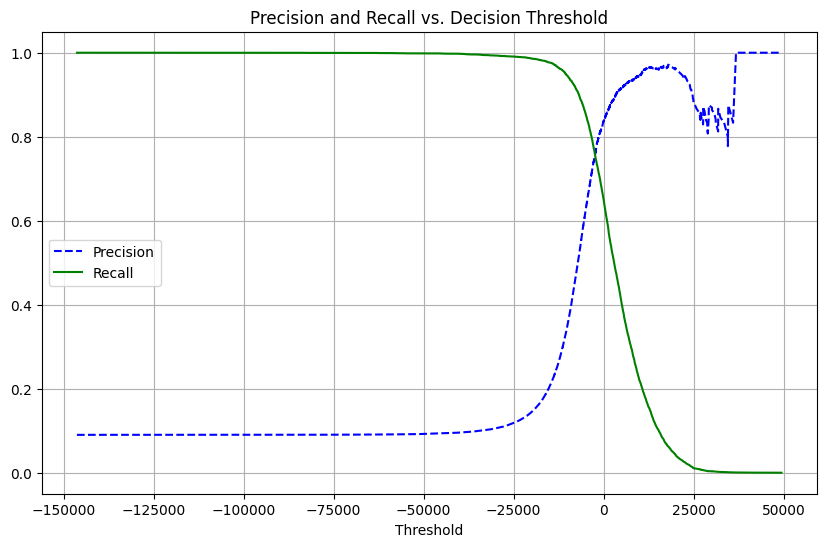

In [16]:
from sklearn.metrics import precision_recall_curve

y_scores_train = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_train)

# Plot presisi dan recall sebagai fungsi dari nilai ambang batas
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.grid(True)
plt.title("Precision and Recall vs. Decision Threshold")
plt.show()

Cara lain untuk memilih trade-off presisi/recall yang baik adalah dengan memplot presisi langsung terhadap recall.

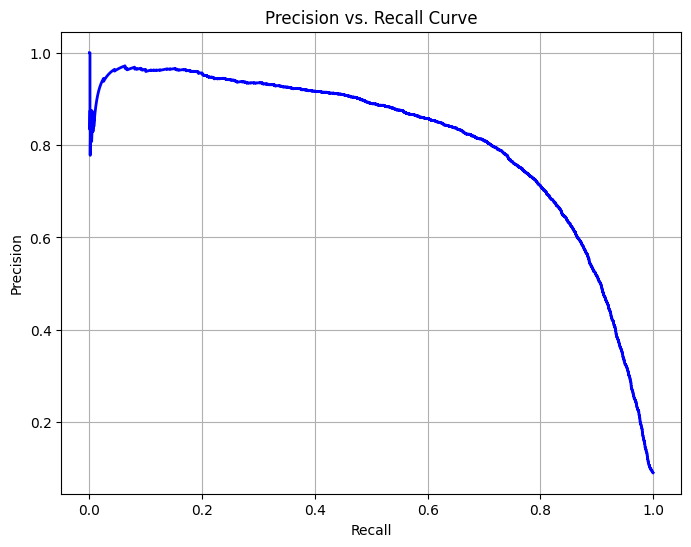

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.title("Precision vs. Recall Curve")
plt.show()

### 3.3.5 The ROC Curve (Kurva ROC)

Kurva *Receiver Operating Characteristic (ROC)* adalah alat umum lainnya yang digunakan dengan classifier biner. Kurva ROC memplot *true positive rate (TPR)* (recall) terhadap *false positive rate (FPR)*. FPR adalah rasio instance negatif yang salah diklasifikasikan sebagai positif. Ini sama dengan 1 – *true negative rate (TNR)*, yang merupakan rasio instance negatif yang diklasifikasikan dengan benar sebagai negatif (TNR juga disebut *specificity*).

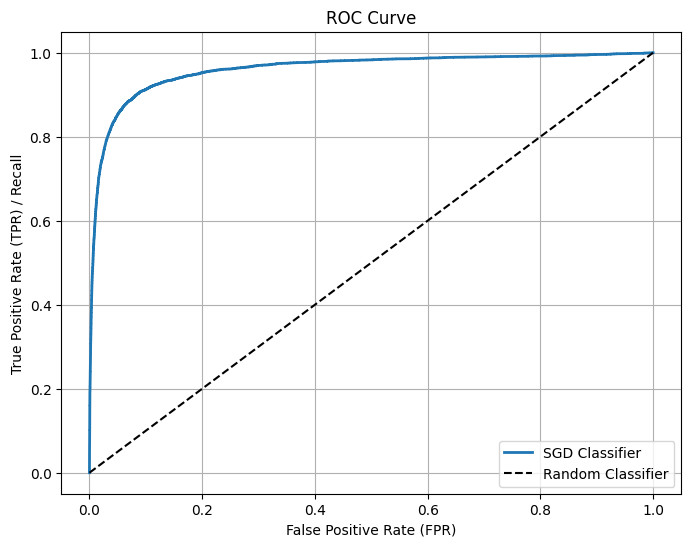

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds_roc = roc_curve(y_train_5, y_scores_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label="SGD Classifier")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier") # Dashed diagonal
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR) / Recall")
plt.grid(True)
plt.legend(loc="lower right")
plt.title("ROC Curve")
plt.show()

Salah satu cara untuk membandingkan classifier adalah dengan mengukur *area under the curve (AUC)*. Classifier yang sempurna akan memiliki ROC AUC sama dengan 1, sedangkan classifier yang sepenuhnya acak akan memiliki ROC AUC sama dengan 0.5.

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_train_5, y_scores_train)
print(f"ROC AUC Score (SGDClassifier): {roc_auc}")

ROC AUC Score (SGDClassifier): 0.9604938554008616


Mari kita latih `RandomForestClassifier` dan bandingkan kurva ROC dan skor ROC AUC-nya dengan `SGDClassifier`. `RandomForestClassifier` tidak memiliki metode `decision_function()`, melainkan metode `predict_proba()`. Metode `predict_proba()` mengembalikan array yang berisi baris per instance dan kolom per kelas, masing-masing berisi probabilitas bahwa instance yang diberikan termasuk dalam kelas yang diberikan.

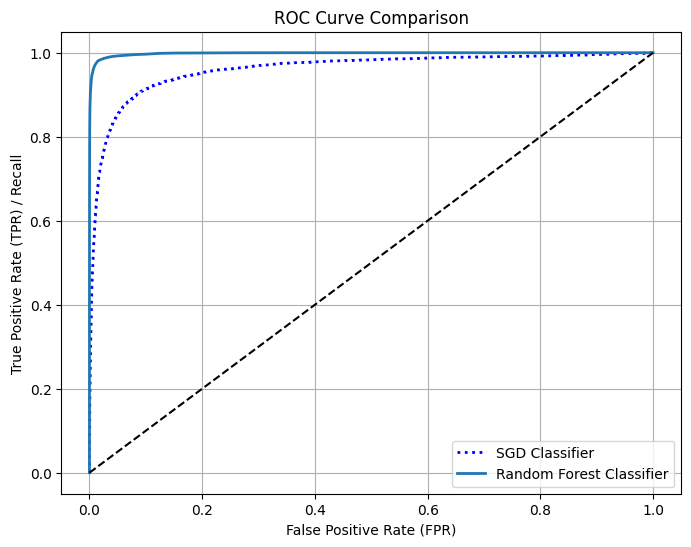

ROC AUC Score (RandomForestClassifier): 0.9983436731328145


In [20]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

# Kita gunakan probabilitas kelas positif sebagai skor
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# Plot perbandingan kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD Classifier")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest Classifier")
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR) / Recall")
plt.grid(True)
plt.legend(loc="lower right")
plt.title("ROC Curve Comparison")
plt.show()

roc_auc_forest = roc_auc_score(y_train_5, y_scores_forest)
print(f"ROC AUC Score (RandomForestClassifier): {roc_auc_forest}")

## 3.4 Multiclass Classification (Klasifikasi Multikelas)

Sementara classifier biner membedakan antara dua kelas, *multiclass classifiers* (juga disebut *multinomial classifiers*) dapat membedakan antara lebih dari dua kelas.

Beberapa algoritma (seperti classifier SGD, classifier Random Forest, dan classifier Naive Bayes) mampu menangani banyak kelas secara native. Yang lain (seperti Logistic Regression atau Support Vector Machine classifiers) adalah classifier biner. Namun, ada berbagai strategi yang dapat Anda gunakan untuk melakukan klasifikasi multikelas dengan beberapa classifier biner.

* **One-versus-the-rest (OvR) / One-versus-all:** Latih 10 classifier biner, satu untuk setiap digit (detektor-0, detektor-1, detektor-2, dan seterusnya). Ketika Anda ingin mengklasifikasikan sebuah gambar, Anda mendapatkan skor keputusan dari setiap classifier untuk gambar itu dan Anda memilih kelas yang classifier-nya menghasilkan skor tertinggi.
* **One-versus-one (OvO):** Latih classifier biner untuk setiap pasangan digit: satu untuk membedakan 0s dan 1s, satu lagi untuk membedakan 0s dan 2s, satu lagi untuk 1s dan 2s, dan seterusnya. Jika ada N kelas, Anda perlu melatih N × (N – 1) / 2 classifier.

Scikit-Learn mendeteksi ketika Anda mencoba menggunakan algoritma klasifikasi biner untuk tugas klasifikasi multikelas, dan secara otomatis menjalankan OvR atau OvO, tergantung pada algoritma.

In [21]:
from sklearn.svm import SVC

# Melatih SVC pada training set menggunakan kelas target asli (y_train)
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, bukan y_train_5

# Prediksi untuk some_digit
some_digit_pred_multiclass = svm_clf.predict([some_digit])
print(f"Prediksi SVC untuk some_digit: {some_digit_pred_multiclass}")

# Melihat skor keputusan (10 skor per instance, satu per kelas)
some_digit_scores = svm_clf.decision_function([some_digit])
print(f"Skor keputusan SVC untuk some_digit: {some_digit_scores}")
print(f"Kelas dengan skor tertinggi: {np.argmax(some_digit_scores)}")
print(f"Daftar kelas: {svm_clf.classes_}")

Prediksi SVC untuk some_digit: [5]
Skor keputusan SVC untuk some_digit: [[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
Kelas dengan skor tertinggi: 5
Daftar kelas: [0 1 2 3 4 5 6 7 8 9]


Melatih `SGDClassifier` (atau `RandomForestClassifier`) sama mudahnya, dan mereka dapat langsung mengklasifikasikan instance ke dalam banyak kelas.

In [22]:
# Melatih SGDClassifier untuk klasifikasi multikelas
sgd_clf.fit(X_train, y_train)
sgd_digit_pred_multiclass = sgd_clf.predict([some_digit])
print(f"Prediksi SGDClassifier untuk some_digit: {sgd_digit_pred_multiclass}")

# Mengevaluasi akurasi SGDClassifier menggunakan cross-validation
sgd_multiclass_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print(f"Skor akurasi multikelas SGDClassifier: {sgd_multiclass_scores}")

Prediksi SGDClassifier untuk some_digit: [3]
Skor akurasi multikelas SGDClassifier: [0.87365 0.85835 0.8689 ]


Akurasi di atas 84% pada semua *test folds* tidak terlalu buruk, tetapi kita masih bisa melakukan yang lebih baik. Menskalakan input (seperti yang dibahas di Bab 2) meningkatkan akurasi di atas 89%.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

sgd_scaled_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print(f"Skor akurasi multikelas SGDClassifier (scaled): {sgd_scaled_scores}")

Skor akurasi multikelas SGDClassifier (scaled): [0.8983 0.891  0.9018]


## 3.5 Error Analysis (Analisis Kesalahan)

Jika ini adalah proyek nyata, Anda sekarang akan mengikuti langkah-langkah dalam daftar periksa proyek Machine Learning Anda (lihat Apendiks B). Anda akan menjelajahi opsi persiapan data, mencoba beberapa model, dan menyempurnakan hyperparameter mereka. Di sini, kita akan mengasumsikan bahwa Anda telah menemukan model yang menjanjikan dan Anda ingin mencari cara untuk memperbaikinya. Salah satu cara untuk melakukannya adalah dengan menganalisis jenis kesalahan yang dibuatnya.

### Visualisasi Confusion Matrix

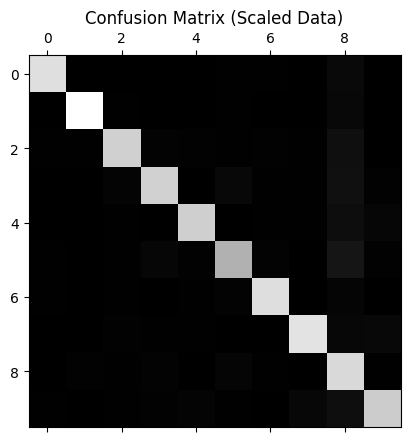

In [24]:
y_train_pred_scaled = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx_scaled = confusion_matrix(y_train, y_train_pred_scaled)

plt.matshow(conf_mx_scaled, cmap=plt.cm.gray)
plt.title("Confusion Matrix (Scaled Data)")
plt.show()

Confusion matrix ini terlihat cukup bagus, karena sebagian besar gambar berada pada diagonal utama, yang berarti diklasifikasikan dengan benar. Angka 5 terlihat sedikit lebih gelap daripada digit lain, yang bisa berarti ada lebih sedikit gambar angka 5 dalam dataset atau bahwa classifier tidak bekerja sebaik pada angka 5 seperti pada digit lainnya.

Untuk fokus pada kesalahan, kita bisa membagi setiap nilai dalam confusion matrix dengan jumlah gambar di kelas yang sesuai, sehingga kita dapat membandingkan tingkat kesalahan alih-alih jumlah kesalahan absolut.

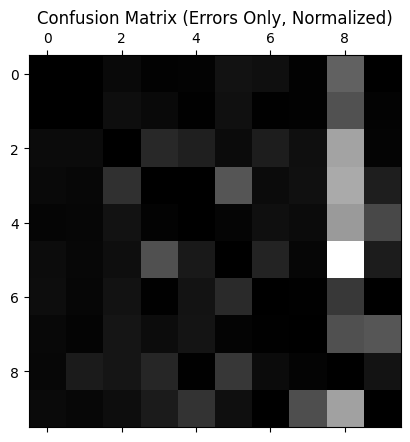

In [25]:
row_sums = conf_mx_scaled.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_scaled / row_sums

# Isi diagonal dengan nol untuk hanya menyimpan kesalahan
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title("Confusion Matrix (Errors Only, Normalized)")
plt.show()

## 3.6 Multilabel Classification (Klasifikasi Multilabel)

Hingga saat ini, setiap instance selalu ditetapkan ke hanya satu kelas. Dalam beberapa kasus, Anda mungkin ingin classifier Anda mengeluarkan banyak kelas untuk setiap instance. Sistem klasifikasi yang mengeluarkan banyak tag biner disebut *multilabel classification system*.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat target multilabel: digit besar (7, 8, atau 9) dan digit ganjil
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

# Melatih KNeighborsClassifier (yang mendukung klasifikasi multilabel)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

# Prediksi untuk some_digit (yang adalah 5)
some_digit_pred_multilabel = knn_clf.predict([some_digit])
print(f"Prediksi multilabel untuk some_digit (5): {some_digit_pred_multilabel}")

Prediksi multilabel untuk some_digit (5): [[False  True]]


Ada banyak cara untuk mengevaluasi classifier multilabel. Salah satu pendekatan adalah mengukur F1 score untuk setiap label individual, lalu menghitung skor rata-rata.

In [27]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_multilabel = f1_score(y_multilabel, y_train_knn_pred, average="macro")
print(f"F1 Score (multilabel, average='macro'): {f1_multilabel}")

F1 Score (multilabel, average='macro'): 0.9764102655606048


## 3.7 Multioutput Classification (Klasifikasi Multioutput)

Jenis tugas klasifikasi terakhir yang akan kita bahas di sini disebut *multioutput-multiclass classification* (atau hanya *multioutput classification*). Ini hanyalah generalisasi dari klasifikasi multilabel di mana setiap label dapat berupa multikelas (yaitu, dapat memiliki lebih dari dua nilai yang mungkin).

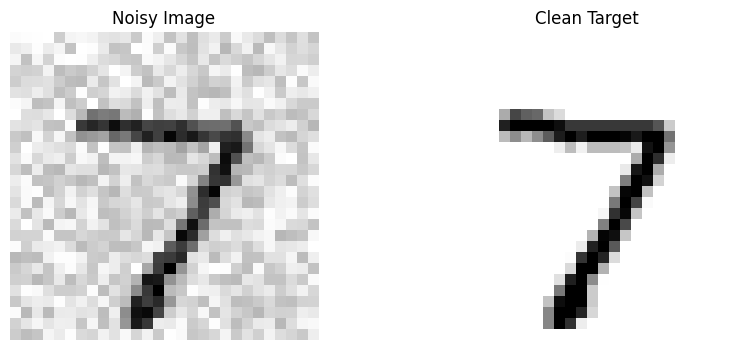

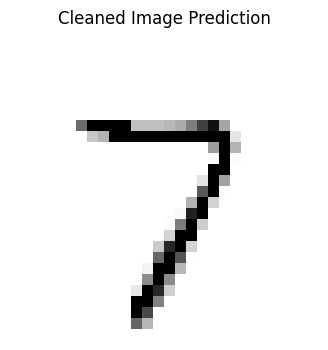

In [28]:
# Membuat training dan test set dengan menambahkan noise pada gambar MNIST
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

# Fungsi untuk memplot digit (dari notebook asli)
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")

# Melihat contoh gambar ber-noise dan target bersih
some_index = 0
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Noisy Image")
plot_digit(X_test_mod[some_index])
plt.subplot(122)
plt.title("Clean Target")
plot_digit(y_test_mod[some_index])
plt.show()

# Melatih classifier dan membersihkan gambar
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit_pred = knn_clf.predict([X_test_mod[some_index]])

plt.figure(figsize=(4, 4))
plt.title("Cleaned Image Prediction")
plot_digit(clean_digit_pred)
plt.show()

Terlihat cukup dekat dengan target! Ini mengakhiri tur kita dalam klasifikasi. Anda sekarang harus tahu cara memilih metrik yang baik untuk tugas klasifikasi, memilih trade-off presisi/recall yang sesuai dengan kebutuhan Anda, membandingkan classifier, dan secara lebih umum membangun sistem klasifikasi yang baik untuk berbagai tugas.